## Q1

there are commented code here. they are the use of complete dataset instead of .mat dataset
but in the conclusion of this question we use the result of the codes below as a observation and test case in order to make a rational justification.

In [73]:
"""import numpy as np
import pandas as pd

# Load data into memory
data = pd.read_csv('mnist_train.csv')

# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y
X = data[:, 1:]
X = X.T

Y = data[:, 0]

d, N = X.shape

def split_data(X, Y, Ntrain):
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Split the data into training and testing sets
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, 45_000)

C1train, C2train = Xtrain[:, Ytrain == 0], Xtrain[:, Ytrain == 8]
C1test, C2test = Xtest[:, Ytest == 0], Xtest[:, Ytest == 8]

U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)

def classifier(U1, U2, y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    if d1 < d2:
        return 3
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(f"Correctly classified as 3: {corr3}, Wrongly classified as 4: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 4: {corr4}, Wrongly classified as 3: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")
print(f"whole accuracy is: {(corr3+corr4)/(corr3+corr4+wrong3+wrong4)}")"""

Correctly classified as 3: 1465, Wrongly classified as 4: 31, accuracy is: 0.9792780748663101
Correctly classified as 4: 1302, Wrongly classified as 3: 128, accuracy is: 0.9104895104895104
whole accuracy is: 0.9456596035543404


In [81]:
from scipy.io import loadmat

def split_data(X, Y, Ntrain):
    N = len(Y)
    if Ntrain >= N:
        raise ValueError("Number of training samples exceeds the total number of samples.")

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

# Load data into memory
mnist_data = loadmat('MNIST.mat')

# Extract X and Y from the loaded data
X = mnist_data['X']
Y = mnist_data['I'].flatten()  # Assuming 'I' contains labels

# Split the data into training and testing sets
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, int(7*len(Y)/10)) 
n1, n2 = 3, 4
C1train, C2train = Xtrain[:, Ytrain == n1], Xtrain[:, Ytrain == n2]
C1test, C2test = Xtest[:, Ytest == n1], Xtest[:, Ytest == n2]
print(C1train.shape)

(256, 86)


In [82]:
U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)

def classifier(U1, U2, y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    if d1 < d2:
        return 3
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(corr3, wrong3)
print(f"Correctly classified as 3: {corr3}, Wrongly classified as 4: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 4: {corr4}, Wrongly classified as 3: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")
print(f"whole accuracy is: {(corr3+corr4)/(corr3+corr4+wrong3+wrong4)}")

44 1
Correctly classified as 3: 44, Wrongly classified as 4: 1, accuracy is: 0.9777777777777777
Correctly classified as 4: 40, Wrongly classified as 3: 0, accuracy is: 1.0
whole accuracy is: 0.9882352941176471


In [68]:
def resulter(n1, n2, printer= False):
    C1train, C2train = Xtrain[:, Ytrain == n1], Xtrain[:, Ytrain == n2]
    C1test, C2test = Xtest[:, Ytest == n1], Xtest[:, Ytest == n2]
    U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
    U2, _, _ = np.linalg.svd(C2train, full_matrices=False)
    if printer:
        print(f"The number of training data for {n1} is {C1train.shape}")
        print(f"The number of training data for {n2} is {C2train.shape}")
        print(f"The number of test data for {n1} is {C1test.shape}")
        print(f"The number of test data for {n2} is {C2test.shape}")

    def classifier(U1, U2, y):
        y1O = U1 @ (U1.T @ y)
        y2O = U2 @ (U2.T @ y)
        d1 = np.linalg.norm(y - y1O, ord=2)
        d2 = np.linalg.norm(y - y2O, ord=2)
        if d1 < d2:
            return n1
        else: 
            return n2

    corr3 = 0
    wrong3 = 0
    for i in range(C1test.shape[1]):
        y = C1test[:, i]
        result = classifier(U1, U2, y)
        if result == n1:
            corr3 += 1
        else: 
            wrong3 += 1

    print(f"Correctly classified as {n1}: {corr3}, Wrongly classified as {n2}: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

    corr4 = 0
    wrong4 = 0
    for i in range(C2test.shape[1]):
        y = C2test[:, i]
        result = classifier(U1, U2, y)
        if result == n2:
            corr4 += 1
        else: 
            wrong4 += 1

    print(f"Correctly classified as {n2}: {corr4}, Wrongly classified as {n1}: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")
    print(f"whole accuracy is: {(corr3+corr4)/(corr3+corr4+wrong3+wrong4)}")


In [72]:
for (i,j,b) in [(0,1,False),(0,9,True),(0,8,True),(3,4,False),(5,6, True),(3,5, True),(8,9, False),(2,6, False),(0,6, True), (6,0, False)]:
    resulter(i,j, b)
    print("***************************************")

Correctly classified as 0: 95, Wrongly classified as 1: 0, accuracy is: 1.0
Correctly classified as 1: 87, Wrongly classified as 0: 0, accuracy is: 1.0
whole accuracy is: 1.0
***************************************
The number of training data for 0 is (256, 224)
The number of training data for 9 is (256, 96)
The number of test data for 0 is (256, 95)
The number of test data for 9 is (256, 36)
Correctly classified as 0: 95, Wrongly classified as 9: 0, accuracy is: 1.0
Correctly classified as 9: 12, Wrongly classified as 0: 24, accuracy is: 0.3333333333333333
whole accuracy is: 0.816793893129771
***************************************
The number of training data for 0 is (256, 224)
The number of training data for 8 is (256, 102)
The number of test data for 0 is (256, 95)
The number of test data for 8 is (256, 42)
Correctly classified as 0: 95, Wrongly classified as 8: 0, accuracy is: 1.0
Correctly classified as 8: 0, Wrongly classified as 0: 42, accuracy is: 0.0
whole accuracy is: 0.6934

The classification results display an irregular pattern. Some pairs, like (0,1), (3,4), (5,6), (3,5), (8,9), and (2,6), show accurate classification, indicating a seemingly robust classifier. However, there's a concern about overfitting, as it appears overly idealistic.

On the other hand, there's another category where accuracy is notably poor. A potential explanation lies in the imbalanced number of data points for certain pairs. To shed light on this, we included the count of data points for each case. Notably, cases with a higher number of training data points tend to exhibit better accuracy.

we have four different interested cases & observations:
    when we test "different looks" but "imbalance" data for (5,6) -> result 'so-called' good
    when we test "similar   looks" and "imbalance" data for (0,8) -> result             bad
    when we test "different looks" and " balance " data for (3,4) -> result 'so-called' good
    when we test "similar   looks" and " balance " data for (9,8) -> result 'so-called' good
    !!! spoiler alert :D !!! the conclusion is that bad result happen when imbalance data set joins the
    different looks
    
    *'so-called': this terms is used because we have a very small training and testing data set. so a 
    good accuracy is not an actually a good result.
    

Consider the example of (0,8):

    Training data for 0: (256, 224)
    Training data for 8: (256, 102)
    Test data for 0: (256, 95)
    Test data for 8: (256, 42)
    Correctly classified as 0: 95, Wrongly classified as 8: 0, accuracy is: ***1.0***
    Correctly classified as 8: 0, Wrongly classified as 0: 42, accuracy is: ***0.0***

The results indicate that digit 0, with twice the training data of digit 6, dominates the classification. Consequently, the classifier tends to categorize inputs as digit 0.

Now, let's examine another case, (5,6):

    Training data for 5: (256, 57)
    Training data for 6: (256, 107)
    Test data for 5: (256, 31)
    Test data for 6: (256, 44)

Surprisingly, despite imbalanced training data, this case doesn't exhibit the same anomaly:

    Accuracy for 5: 0.935 (Correctly classified as 5: 29, Wrongly classified as 6: 2)
    Accuracy for 6: 1.0 (Correctly classified as 6: 44, Wrongly classified as 5: 0)
    Overall accuracy: 0.973

The absence of a similar anomaly in this case suggests that factors beyond imbalanced data contribute to classification challenges. It could be attributed to the similarity between the digits, as observed in the case of (0,8). In instances where visually similar digits are involved, imbalanced data exacerbates challenges, resulting in suboptimal outcomes.

0 <--similar--> 8 | 0 <--similar--> 9 => 8 <--similar--> 9  :
and last note is that (0,8), (0,9) are those cases with problems. why (8,9) are not case to disccuss.
similarity in looks is a Transitive relationship. so (8,9) have the same relation. why their accuracy is high. as we mentioned before the cause of bad accuracy is not only because of the "looks". 
The number of training data for 9 is (256, 96)
The number of training data for 8 is (256, 102)
case (8,9) is a case with balance data. so that's why similarity in looks doesnt become a case of inaccuracy here.

As a validation test, the model was applied to the (0,8) case using a complete dataset with a more extensive range of data points. As evident, the accuracy improved and became acceptable. (results can be find at the beging of the file)

In [83]:
C1train, C2train, C3train = Xtrain[:, Ytrain == 3], Xtrain[:, Ytrain == 4], Xtrain[:, Ytrain == 5]
C1test, C2test, C3test = Xtest[:, Ytest == 3], Xtest[:, Ytest == 4], Xtest[:, Ytest == 5]

U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)
U3, _, _ = np.linalg.svd(C3train, full_matrices=False)

def classifier(U1, U2, U3,y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    y3O = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    d3 = np.linalg.norm(y - y3O, ord=2)
    if d1 < d2 and d1 < d3:
        return 3
    elif d3 < d1 and d3 < d2:
        return 5
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(f"Correctly classified as 3: {corr3}, Wrongly classified as 4 or 5: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2 , U3, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 4: {corr4}, Wrongly classified as 3 or 5: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")

corr5 = 0
wrong5 = 0
for i in range(C3test.shape[1]):
    y = C3test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 5:
        corr5 += 1
    else: 
        wrong5 += 1

print(f"Correctly classified as 5: {corr5}, Wrongly classified as 3 or 4: {wrong5}, accuracy is: {corr5/(corr5+wrong5)}")



Correctly classified as 3: 44, Wrongly classified as 4 or 5: 1, accuracy is: 0.9777777777777777
Correctly classified as 4: 40, Wrongly classified as 3 or 5: 0, accuracy is: 1.0
Correctly classified as 5: 20, Wrongly classified as 3 or 4: 9, accuracy is: 0.6896551724137931


In [85]:
C1train, C2train, C3train = Xtrain[:, Ytrain == 0], Xtrain[:, Ytrain == 8], Xtrain[:, Ytrain == 9]
C1test, C2test, C3test = Xtest[:, Ytest == 0], Xtest[:, Ytest == 8], Xtest[:, Ytest == 9]

U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)
U3, _, _ = np.linalg.svd(C3train, full_matrices=False)

def classifier(U1, U2, U3,y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    y3O = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    d3 = np.linalg.norm(y - y3O, ord=2)
    if d1 < d2 and d1 < d3:
        return 3
    elif d3 < d1 and d3 < d2:
        return 5
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(f"Correctly classified as 3: {corr3}, Wrongly classified as 4 or 5: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2 , U3, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 4: {corr4}, Wrongly classified as 3 or 5: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")

corr5 = 0
wrong5 = 0
for i in range(C3test.shape[1]):
    y = C3test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 5:
        corr5 += 1
    else: 
        wrong5 += 1


print(f"Correctly classified as 5: {corr5}, Wrongly classified as 3 or 4: {wrong5}, accuracy is: {corr5/(corr5+wrong5)}")

print("the result for 0,8,9 insted of 3,4,5")

Correctly classified as 3: 91, Wrongly classified as 4 or 5: 0, accuracy is: 1.0
Correctly classified as 4: 2, Wrongly classified as 3 or 5: 39, accuracy is: 0.04878048780487805
Correctly classified as 5: 11, Wrongly classified as 3 or 4: 29, accuracy is: 0.275
the result for 0,8,9 insted of 3,4,5


As you can see the result are same for two digits classification. for those who have difference in their looks the results are much more different than the others.
but in those who have similarity in their looks and also imbalance data result are in favor of that who have b

In [87]:
C1train, C2train, C3train = Xtrain[:, Ytrain == 0], Xtrain[:, Ytrain == 8], Xtrain[:, Ytrain == 1]
C1test, C2test, C3test = Xtest[:, Ytest == 0], Xtest[:, Ytest == 8], Xtest[:, Ytest == 1]

U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)
U3, _, _ = np.linalg.svd(C3train, full_matrices=False)

def classifier(U1, U2, U3,y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    y3O = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    d3 = np.linalg.norm(y - y3O, ord=2)
    if d1 < d2 and d1 < d3:
        return 3
    elif d3 < d1 and d3 < d2:
        return 5
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(f"Correctly classified as 3: {corr3}, Wrongly classified as 4 or 5: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2 , U3, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 4: {corr4}, Wrongly classified as 3 or 5: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")

corr5 = 0
wrong5 = 0
for i in range(C3test.shape[1]):
    y = C3test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 5:
        corr5 += 1
    else: 
        wrong5 += 1


print(f"Correctly classified as 5: {corr5}, Wrongly classified as 3 or 4: {wrong5}, accuracy is: {corr5/(corr5+wrong5)}")

print("the result for 0,8,1 insted of 3,4,5")

Correctly classified as 3: 90, Wrongly classified as 4 or 5: 1, accuracy is: 0.989010989010989
Correctly classified as 4: 1, Wrongly classified as 3 or 5: 40, accuracy is: 0.024390243902439025
Correctly classified as 5: 77, Wrongly classified as 3 or 4: 1, accuracy is: 0.9871794871794872
the result for 0,8,9 insted of 3,4,5


As you can see for 0,8,1 the accuracy is good for 0 and 1 because of the reasonings before.

regard the question I explained them completly during the descriptions except one.
question: Consider the SVD Classification algorithm for the digits 3 and 4 on MNIST dataset. What happens to the accuracy when grows? Why the accuracy over the test set does not increase monotonically?

::: we introduce the problem in whole before. so by increasing the K the problem doesnt increasingly get worst. it depends what permutations of digits we consider. if we consider those which have similar looks and imbalanced data, we would observe bad results in favor of the one who has the more datapoints.

In [3]:
"""C1train, C2train = Xtrain[:, Ytrain == 5], Xtrain[:, Ytrain == 6]
C1test, C2test = Xtest[:, Ytest == 5], Xtest[:, Ytest == 6]

U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)

def classifier(U1, U2, y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    if d1 < d2:
        return 3
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(f"Correctly classified as 5: {corr3}, Wrongly classified as 6: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 6: {corr4}, Wrongly classified as 5: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")
print(f"whole accuracy is: {(corr3+corr4)/(corr3+corr4+wrong3+wrong4)}")
"""

Correctly classified as 5: 1056, Wrongly classified as 6: 234, accuracy is: 0.8186046511627907
Correctly classified as 6: 1475, Wrongly classified as 5: 6, accuracy is: 0.9959486833220796
whole accuracy is: 0.9133886683507759


##### it seams that when it comes to classify 5,6 the accuracy drop in a meaningful way. so this decline must sure related to the characterestics of 5,6 because the only have very few difference in looks. we draw this conclusion because it didnt happen for 3,4 classification and they have more different things in their looks.

In [16]:
"""C1train, C2train, C3train = Xtrain[:, Ytrain == 3], Xtrain[:, Ytrain == 4], Xtrain[:, Ytrain == 5]
C1test, C2test, C3test = Xtest[:, Ytest == 3], Xtest[:, Ytest == 4], Xtest[:, Ytest == 5]

U1, _, _ = np.linalg.svd(C1train, full_matrices=False)
U2, _, _ = np.linalg.svd(C2train, full_matrices=False)
U3, _, _ = np.linalg.svd(C3train, full_matrices=False)

def classifier(U1, U2, U3,y):
    y1O = U1 @ (U1.T @ y)
    y2O = U2 @ (U2.T @ y)
    y3O = U3 @ (U3.T @ y)
    d1 = np.linalg.norm(y - y1O, ord=2)
    d2 = np.linalg.norm(y - y2O, ord=2)
    d3 = np.linalg.norm(y - y3O, ord=2)
    if d1 < d2 and d1 < d3:
        return 3
    elif d3 < d1 and d3 < d2:
        return 5
    else: 
        return 4

corr3 = 0
wrong3 = 0
for i in range(C1test.shape[1]):
    y = C1test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 3:
        corr3 += 1
    else: 
        wrong3 += 1

print(f"Correctly classified as 3: {corr3}, Wrongly classified as 4 or 5: {wrong3}, accuracy is: {corr3/(corr3+wrong3)}")

corr4 = 0
wrong4 = 0
for i in range(C2test.shape[1]):
    y = C2test[:, i]
    result = classifier(U1, U2 , U3, y)
    if result == 4:
        corr4 += 1
    else: 
        wrong4 += 1

print(f"Correctly classified as 4: {corr4}, Wrongly classified as 3 or 5: {wrong4}, accuracy is: {corr4/(corr4+wrong4)}")

corr5 = 0
wrong5 = 0
for i in range(C3test.shape[1]):
    y = C3test[:, i]
    result = classifier(U1, U2, U3, y)
    if result == 5:
        corr5 += 1
    else: 
        wrong5 += 1

print(f"Correctly classified as 5: {corr5}, Wrongly classified as 3 or 4: {wrong5}, accuracy is: {corr5/(corr5+wrong5)}")


"""

Correctly classified as 3: 1463, Wrongly classified as 4 or 5: 66, accuracy is: 0.9568345323741008
Correctly classified as 4: 1366, Wrongly classified as 3 or 5: 125, accuracy is: 0.9161636485580148
Correctly classified as 5: 1019, Wrongly classified as 3 or 4: 299, accuracy is: 0.7731411229135053


##### the result is not bad for 3 class classification however the result drop for the third class (number 5) for ~20% which is significant

## Q2

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data into memory
data = pd.read_csv('mnist_train.csv')
X = data.iloc[:, 1:].values.T
Y = data.iloc[:, 0].values

# Select digits you want to work with
selected_digits = [0, 6, 9]

# Filter out the selected digits
X_selected = X[:, np.isin(Y, selected_digits)]
Y_selected = Y[np.isin(Y, selected_digits)]

# Split into train and test datasets
Ntrain = int(0.8 * X_selected.shape[1])
X_train = X_selected[:, :Ntrain]
Y_train = Y_selected[:Ntrain]
X_test = X_selected[:, Ntrain:]
Y_test = Y_selected[Ntrain:]

# PCA implementation
def perform_pca(X, k):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    U, S, Vt = np.linalg.svd(X_centered)
    return U[:, :k].T @ X_centered


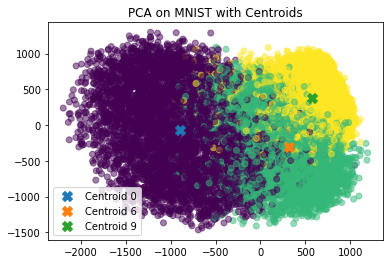

Average distances (Training set): {0: 762.726724147243, 6: 563.5549388441327, 9: 391.1792786474501}
Average distances (Test set): {0: 701.288252055343, 6: 521.3280076643197, 9: 362.3912750554149}
Classification Accuracy: 0.89


In [49]:

# Perform PCA
k = 2
X_train_pca = perform_pca(X_train, k)
X_test_pca = perform_pca(X_test, k)

# Compute centroids
def compute_centroids(data, labels):
    centroids = {}
    for digit in selected_digits:
        centroids[digit] = np.mean(data[:, labels == digit], axis=1)
    return centroids

centroids = compute_centroids(X_train_pca, Y_train)

# Plot with centroids
plt.scatter(X_train_pca[0, :], X_train_pca[1, :], c=Y_train, cmap='viridis', alpha=0.5)
for digit, centroid in centroids.items():
    plt.scatter(*centroid, marker='X', s=100, label=f'Centroid {digit}')
plt.legend()
plt.title('PCA on MNIST with Centroids')
plt.show()

# Compute average distance from centroids
def average_distance_from_centroids(data, centroids, labels):
    avg_distances = {}
    for digit, centroid in centroids.items():
        distances = np.linalg.norm(data[:, labels == digit] - centroid[:, np.newaxis], axis=0)
        avg_distances[digit] = np.mean(distances)
    return avg_distances

avg_distances_train = average_distance_from_centroids(X_train_pca, centroids, Y_train)
avg_distances_test = average_distance_from_centroids(X_test_pca, centroids, Y_test)
print(f'Average distances (Training set): {avg_distances_train}')
print(f'Average distances (Test set): {avg_distances_test}')

# Classification based on centroid proximity
def classify_using_centroids(x, centroids):
    distances = {digit: np.linalg.norm(x - centroid) for digit, centroid in centroids.items()}
    return min(distances, key=distances.get)

# Classify test set
predictions = np.array([classify_using_centroids(X_test_pca[:, i], centroids) for i in range(X_test_pca.shape[1])])
accuracy = np.mean(predictions == Y_test)
print(f'Classification Accuracy: {accuracy:.2f}')


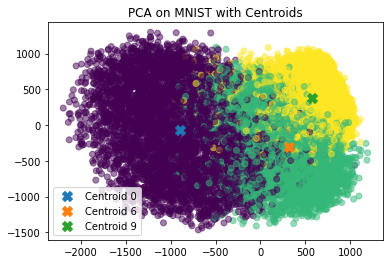

Average distances (Training set): {0: 859.6103370114149, 6: 695.8688331988427, 9: 495.2443073717309}
Average distances (Test set): {0: 851.4735766660164, 6: 723.4806177015697, 9: 497.98168485907934}
Classification Accuracy: 0.91


In [51]:

# PCA implementation
def perform_pca(X, k):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    U, S, Vt = np.linalg.svd(X_centered)
    return U[:, :k].T @ X_centered

# Perform PCA
k = 3
X_train_pca = perform_pca(X_train, k)
X_test_pca = perform_pca(X_test, k)

# Compute centroids
def compute_centroids(data, labels):
    centroids = {}
    for digit in selected_digits:
        centroids[digit] = np.mean(data[:, labels == digit], axis=1)
    return centroids

centroids = compute_centroids(X_train_pca, Y_train)

# Plot with centroids
# Plot with centroids for the first two principal components
plt.scatter(X_train_pca[0, :], X_train_pca[1, :], c=Y_train, cmap='viridis', alpha=0.5)
for digit, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], marker='X', s=100, label=f'Centroid {digit}')
plt.legend()
plt.title('PCA on MNIST with Centroids')
plt.show()

# Compute average distance from centroids
def average_distance_from_centroids(data, centroids, labels):
    avg_distances = {}
    for digit, centroid in centroids.items():
        distances = np.linalg.norm(data[:, labels == digit] - centroid[:, np.newaxis], axis=0)
        avg_distances[digit] = np.mean(distances)
    return avg_distances

avg_distances_train = average_distance_from_centroids(X_train_pca, centroids, Y_train)
avg_distances_test = average_distance_from_centroids(X_test_pca, centroids, Y_test)
print(f'Average distances (Training set): {avg_distances_train}')
print(f'Average distances (Test set): {avg_distances_test}')

# Classification based on centroid proximity
def classify_using_centroids(x, centroids):
    distances = {digit: np.linalg.norm(x - centroid) for digit, centroid in centroids.items()}
    return min(distances, key=distances.get)

# Classify test set
predictions = np.array([classify_using_centroids(X_test_pca[:, i], centroids) for i in range(X_test_pca.shape[1])])
accuracy = np.mean(predictions == Y_test)
print(f'Classification Accuracy: {accuracy:.2f}')


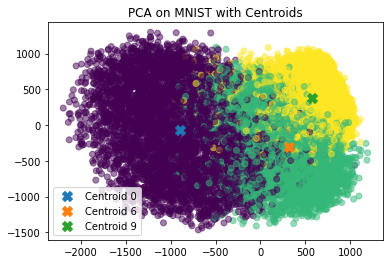

Average distances (Training set): {0: 964.353344228727, 6: 811.7127269115902, 9: 631.4569732712479}
Average distances (Test set): {0: 974.6389941268359, 6: 843.9314460622404, 9: 673.4031746283183}
Classification Accuracy: 0.89


In [54]:
# PCA implementation
def perform_pca(X, k):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    U, S, Vt = np.linalg.svd(X_centered)
    return U[:, :k].T @ X_centered

# Perform PCA
k = 4
X_train_pca = perform_pca(X_train, k)
X_test_pca = perform_pca(X_test, k)

# Compute centroids
def compute_centroids(data, labels):
    centroids = {}
    for digit in selected_digits:
        centroids[digit] = np.mean(data[:, labels == digit], axis=1)
    return centroids

centroids = compute_centroids(X_train_pca, Y_train)

# Plot with centroids
# Plot with centroids for the first two principal components
plt.scatter(X_train_pca[0, :], X_train_pca[1, :], c=Y_train, cmap='viridis', alpha=0.5)
for digit, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], marker='X', s=100, label=f'Centroid {digit}')
plt.legend()
plt.title('PCA on MNIST with Centroids')
plt.show()

# Compute average distance from centroids
def average_distance_from_centroids(data, centroids, labels):
    avg_distances = {}
    for digit, centroid in centroids.items():
        distances = np.linalg.norm(data[:, labels == digit] - centroid[:, np.newaxis], axis=0)
        avg_distances[digit] = np.mean(distances)
    return avg_distances

avg_distances_train = average_distance_from_centroids(X_train_pca, centroids, Y_train)
avg_distances_test = average_distance_from_centroids(X_test_pca, centroids, Y_test)
print(f'Average distances (Training set): {avg_distances_train}')
print(f'Average distances (Test set): {avg_distances_test}')

# Classification based on centroid proximity
def classify_using_centroids(x, centroids):
    distances = {digit: np.linalg.norm(x - centroid) for digit, centroid in centroids.items()}
    return min(distances, key=distances.get)

# Classify test set
predictions = np.array([classify_using_centroids(X_test_pca[:, i], centroids) for i in range(X_test_pca.shape[1])])
accuracy = np.mean(predictions == Y_test)
print(f'Classification Accuracy: {accuracy:.2f}')


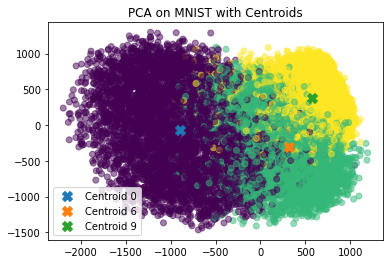

Average distances (Training set): {0: 1089.7617254751533, 6: 901.383014546235, 9: 677.1997284345911}
Average distances (Test set): {0: 1100.9571590454732, 6: 934.018076255433, 9: 725.7986795262822}
Classification Accuracy: 0.89


In [52]:

# PCA implementation
def perform_pca(X, k):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    U, S, Vt = np.linalg.svd(X_centered)
    return U[:, :k].T @ X_centered

# Perform PCA
k = 5
X_train_pca = perform_pca(X_train, k)
X_test_pca = perform_pca(X_test, k)

# Compute centroids
def compute_centroids(data, labels):
    centroids = {}
    for digit in selected_digits:
        centroids[digit] = np.mean(data[:, labels == digit], axis=1)
    return centroids

centroids = compute_centroids(X_train_pca, Y_train)

# Plot with centroids
# Plot with centroids for the first two principal components
plt.scatter(X_train_pca[0, :], X_train_pca[1, :], c=Y_train, cmap='viridis', alpha=0.5)
for digit, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], marker='X', s=100, label=f'Centroid {digit}')
plt.legend()
plt.title('PCA on MNIST with Centroids')
plt.show()

# Compute average distance from centroids
def average_distance_from_centroids(data, centroids, labels):
    avg_distances = {}
    for digit, centroid in centroids.items():
        distances = np.linalg.norm(data[:, labels == digit] - centroid[:, np.newaxis], axis=0)
        avg_distances[digit] = np.mean(distances)
    return avg_distances

avg_distances_train = average_distance_from_centroids(X_train_pca, centroids, Y_train)
avg_distances_test = average_distance_from_centroids(X_test_pca, centroids, Y_test)
print(f'Average distances (Training set): {avg_distances_train}')
print(f'Average distances (Test set): {avg_distances_test}')

# Classification based on centroid proximity
def classify_using_centroids(x, centroids):
    distances = {digit: np.linalg.norm(x - centroid) for digit, centroid in centroids.items()}
    return min(distances, key=distances.get)

# Classify test set
predictions = np.array([classify_using_centroids(X_test_pca[:, i], centroids) for i in range(X_test_pca.shape[1])])
accuracy = np.mean(predictions == Y_test)
print(f'Classification Accuracy: {accuracy:.2f}')


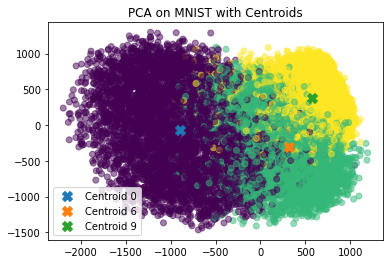

Average distances (Training set): {0: 1303.812645222094, 6: 1106.5518447498873, 9: 1001.4830349347195}
Average distances (Test set): {0: 1315.226161371252, 6: 1155.801036360498, 9: 1025.0696286618002}
Classification Accuracy: 0.89


In [53]:

# PCA implementation
def perform_pca(X, k):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    U, S, Vt = np.linalg.svd(X_centered)
    return U[:, :k].T @ X_centered

# Perform PCA
k = 10
X_train_pca = perform_pca(X_train, k)
X_test_pca = perform_pca(X_test, k)

# Compute centroids
def compute_centroids(data, labels):
    centroids = {}
    for digit in selected_digits:
        centroids[digit] = np.mean(data[:, labels == digit], axis=1)
    return centroids

centroids = compute_centroids(X_train_pca, Y_train)

# Plot with centroids
# Plot with centroids for the first two principal components
plt.scatter(X_train_pca[0, :], X_train_pca[1, :], c=Y_train, cmap='viridis', alpha=0.5)
for digit, centroid in centroids.items():
    plt.scatter(centroid[0], centroid[1], marker='X', s=100, label=f'Centroid {digit}')
plt.legend()
plt.title('PCA on MNIST with Centroids')
plt.show()

# Compute average distance from centroids
def average_distance_from_centroids(data, centroids, labels):
    avg_distances = {}
    for digit, centroid in centroids.items():
        distances = np.linalg.norm(data[:, labels == digit] - centroid[:, np.newaxis], axis=0)
        avg_distances[digit] = np.mean(distances)
    return avg_distances

avg_distances_train = average_distance_from_centroids(X_train_pca, centroids, Y_train)
avg_distances_test = average_distance_from_centroids(X_test_pca, centroids, Y_test)
print(f'Average distances (Training set): {avg_distances_train}')
print(f'Average distances (Test set): {avg_distances_test}')

# Classification based on centroid proximity
def classify_using_centroids(x, centroids):
    distances = {digit: np.linalg.norm(x - centroid) for digit, centroid in centroids.items()}
    return min(distances, key=distances.get)

# Classify test set
predictions = np.array([classify_using_centroids(X_test_pca[:, i], centroids) for i in range(X_test_pca.shape[1])])
accuracy = np.mean(predictions == Y_test)
print(f'Classification Accuracy: {accuracy:.2f}')


##### by changing the k from 4 to 10 THE ACCURACY DEACREASED TO the amount of k=2